In [1]:
function_path="analyses/jennifer/notebooks/functions.R"
wd_path="/projects/CARDIPS/analysis/epigenome_resource"
setwd(wd_path)
source(function_path)

theme_bw2 = theme_bw() +
    theme(
        axis.text = element_text(size = 12),
        strip.text = element_text(size = 12),
        axis.title = element_text(size = 12),
        legend.text = element_text(size = 12),
        legend.title = element_text(size = 12),
        legend.position = "top"
    )

### load source data 

cvpc274_man = fread("~/projects/Resource/iPSCORE_Multi-QTL_Resource/SourceData/SOURCEDATA.FIGURE6C.txt",sep="\t",data.table=F)





,snp_id,chrom,pos,ref,alt,pval,element_id,type,R2,topsnp_pos,LD_group,color
,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<fct>,<chr>,<dbl>,<int>,<chr>,<chr>
1,13_73840707_G_A,chr13,73840707,G,A,0.70278121,cvpc_chip_peak_17303,haQTL,0.00646648,73937854,0-0.2,darkblue
2,13_73840707_G_A,chr13,73840707,G,A,0.08871560,QRS Duration,GWAS,0.00646648,73937854,0-0.2,darkblue
3,13_73840913_T_G,chr13,73840913,T,G,0.67408625,cvpc_chip_peak_17303,haQTL,0.00594313,73937854,0-0.2,darkblue
4,13_73840913_T_G,chr13,73840913,T,G,0.08851156,QRS Duration,GWAS,0.00594313,73937854,0-0.2,darkblue
5,13_73841296_T_C,chr13,73841296,T,C,0.67408625,cvpc_chip_peak_17303,haQTL,0.00594313,73937854,0-0.2,darkblue
6,13_73841296_T_C,chr13,73841296,T,C,0.08933055,QRS Duration,GWAS,0.00594313,73937854,0-0.2,darkblue


Warning message:
“Removed 482 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 9 rows containing missing values or values outside the scale range
(`geom_point()`).”


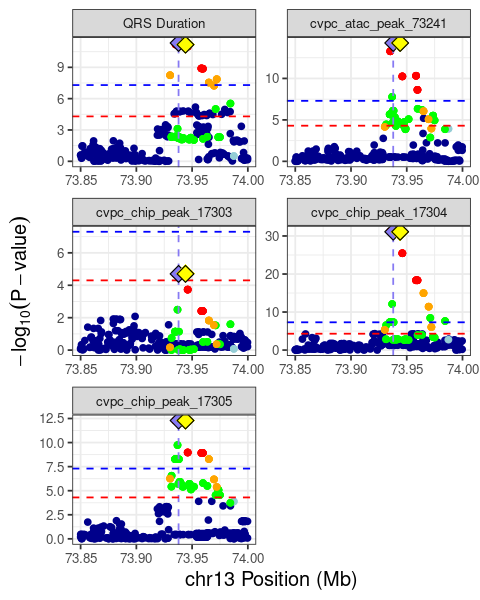

In [3]:
psize(4,5)
topsnp_pos = 73937854
cvpc274_man$element_id = factor(cvpc274_man$element_id, levels = c("QRS Duration","cvpc_atac_peak_73241",
                                                                "cvpc_chip_peak_17303","cvpc_chip_peak_17304",
                                                               "cvpc_chip_peak_17305"))
head(cvpc274_man)
cvpc274_plot = ggplot(cvpc274_man, aes(x = pos/1e6, y = -log10(pval), color = color)) + geom_point() + theme_bw2 + 
    facet_wrap(.~element_id, ncol = 2, scales = "free") +
    theme(strip.text = element_text(size= 8),
         axis.text = element_text(size= 8)) + xlab("chr13 Position (Mb)") + ylab(bquote(-log[10](P-value)))+
    geom_point(data = cvpc274_man %>% filter(R2 >= 0.2)) + 
    geom_point(data = cvpc274_man %>% filter(R2 >= 0.4)) + 
    geom_point(data = cvpc274_man %>% filter(R2 >= 0.6)) + 
    geom_point(data = cvpc274_man %>% filter(R2 >= 0.8)) +
    scale_color_identity()  +
    geom_vline(xintercept = topsnp_pos/1e6, linetype = "dashed", color = "#877af3")  + 
    geom_hline(data = cvpc274_man, aes(yintercept = -log10(5e-5)), linetype = "dashed", color = "red") + 
    geom_hline(data = cvpc274_man, aes(yintercept = -log10(5e-8)), linetype = "dashed", color = "blue") +
    geom_point(data = cvpc274_man %>% filter(pos == topsnp_pos), color = "#877af3", size = 4, shape = 18) + 
    geom_point(data = cvpc274_man %>% filter(pos == topsnp_pos), color = "black", size = 3, shape = 5) +
    geom_point(data = cvpc274_man %>% filter(pos == 73944073), color = "yellow", size = 5, shape = 18) + 
    geom_point(data = cvpc274_man %>% filter(pos == 73944073), color = "black", size = 3, shape = 5) + 
    xlim(73.85, 74)

cvpc274_plot



In [38]:
png("~/projects/Resource/notebooks/toGitHub/figures/supp_figure11_cvpc.png",res=300,units="in",height=5,width=5)
psize(5,5)
cvpc274_plot
dev.off()

Warning message:
“Removed 482 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 9 rows containing missing values or values outside the scale range
(`geom_point()`).”


png 
  2